<a href="https://colab.research.google.com/github/LLewis/kaggle-deep-learning/blob/main/LLewis_Over_Under_Fitting_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Underfitting and Overfitting Training Model
- reference: Kaggle https://www.kaggle.com/code/ryanholbrook/overfitting-and-underfitting/tutorial


In [27]:
#import libraries
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/sample_data/red-wine.csv')
#print(red_wine.shape)
#red_wine.head()

#Prep data   - Review data prepping more

#Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

#Scale to [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

#Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

#display(df_train.head(4))
#display(df_valid.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


- Create Early Stopping using the callbacks function - to prevent the model from eagerly learning noise, which can cause the validation loss to increase over training.  The validation loss needs to decrease
- Build model architecture, four layers, 1500+ nodes
- Compile model using Adam as optimizer and MAE (Mean Absolute Error) as loss function

In [34]:
#import libraries
from tensorflow import keras
from keras import layers, callbacks

#create early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, #minimum amount of change to count as an improvement
    patience=20, #how many epochs to wait before stopping
    restore_best_weights=True,
)

#create model architecture
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

#create optimizer and loss using the compile() function
model.compile(
    optimizer ='adam',
    loss='mae',
)

Minimum validation loss: 0.09111301600933075


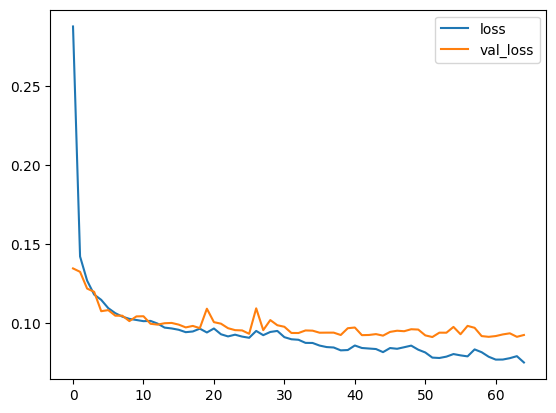

In [35]:
#fit data to model and add callback variable early_stopping as argument

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],  #can have several callbacks, so put in a list
    verbose=0,  #turn off training log

)

#plot loss and validation loss
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))


Keras callback stopped the training at around 60 epochs, well before the full 500 epochs